In [269]:
from skimage.io import imread
import skimage.io as ski
from skimage.util import img_as_float32
from skimage.metrics import peak_signal_noise_ratio
import pylab
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import math
%matplotlib inline

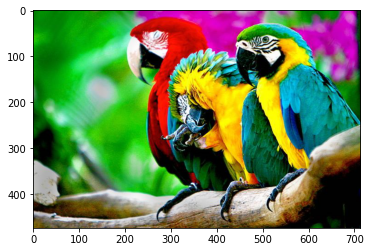

In [270]:
image = imread('parrots.jpeg')
pylab.imshow(image)

In [271]:
img_shape = image.shape
image = img_as_float32(image)
converted = image.reshape((img_shape[0] * img_shape[1], 3))

clusters: 2
 mean psnr: 12.080174506007157
clusters: 2
 meadian psnr: 12.080174506007157


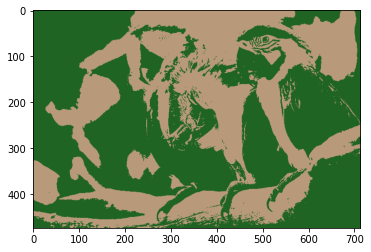

clusters: 3
 mean psnr: 13.153442121588201
clusters: 3
 meadian psnr: 13.153442121588201


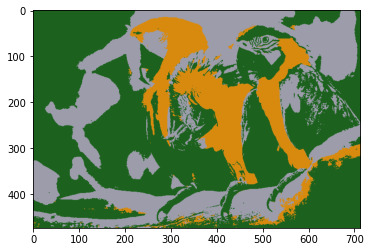

clusters: 4
 mean psnr: 14.367787105638817
clusters: 4
 meadian psnr: 14.367787105638817


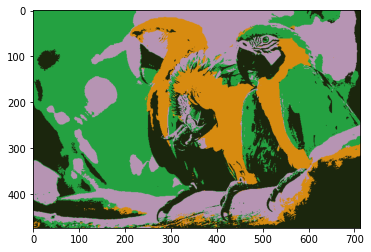

clusters: 5
 mean psnr: 15.527038064498582
clusters: 5
 meadian psnr: 15.527038064498582


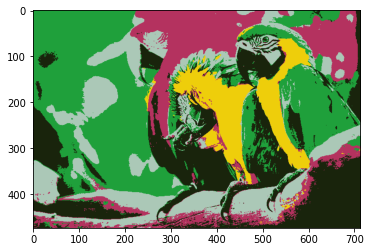

clusters: 6
 mean psnr: 16.543989417365516
clusters: 6
 meadian psnr: 16.543989417365516


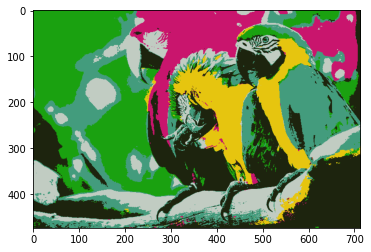

clusters: 7
 mean psnr: 17.640932669748462
clusters: 7
 meadian psnr: 17.640932669748462


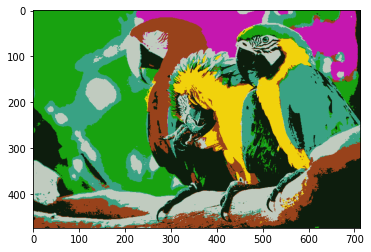

clusters: 8
 mean psnr: 18.436785129736432
clusters: 8
 meadian psnr: 18.436785129736432


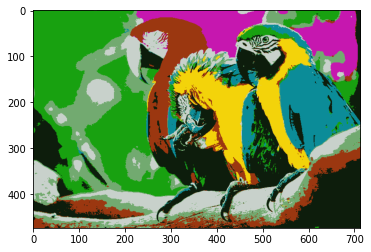

clusters: 9
 mean psnr: 19.112544073676368
clusters: 9
 meadian psnr: 19.112544073676368


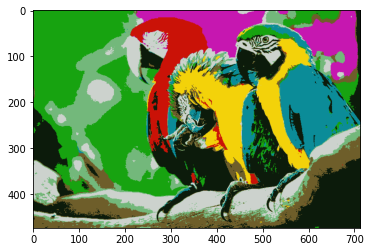

clusters: 10
 mean psnr: 19.639637017634172
clusters: 10
 meadian psnr: 19.639637017634172


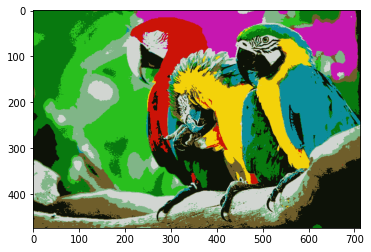

clusters: 11
 mean psnr: 20.127552742395252
clusters: 11
 meadian psnr: 20.127552742395252


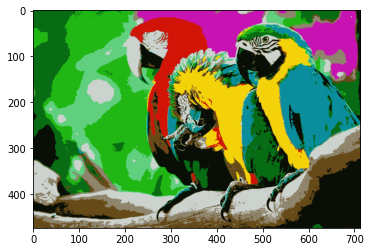

clusters: 12
 mean psnr: 20.592287638690525
clusters: 12
 meadian psnr: 20.592287638690525


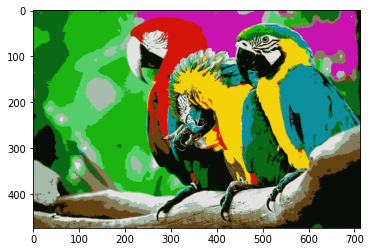

clusters: 13
 mean psnr: 21.021081841938354
clusters: 13
 meadian psnr: 21.021081841938354


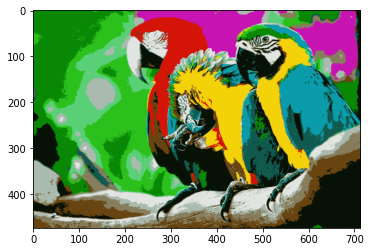

clusters: 14
 mean psnr: 21.3283659668356
clusters: 14
 meadian psnr: 21.3283659668356


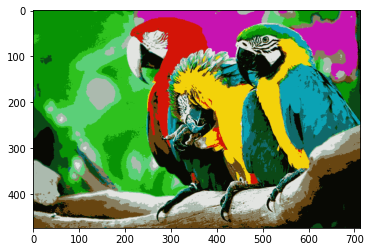

clusters: 15
 mean psnr: 21.60688737828874
clusters: 15
 meadian psnr: 21.60688737828874


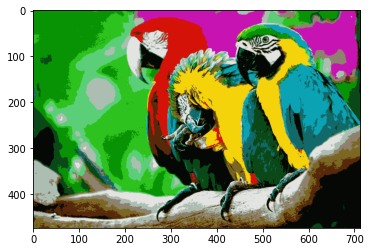

clusters: 16
 mean psnr: 21.862791811366474
clusters: 16
 meadian psnr: 21.862791811366474


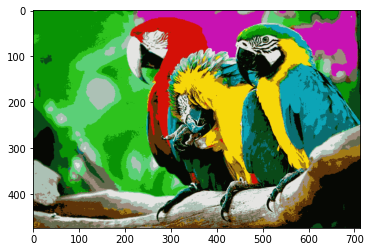

clusters: 17
 mean psnr: 22.119011289444494
clusters: 17
 meadian psnr: 22.119011289444494


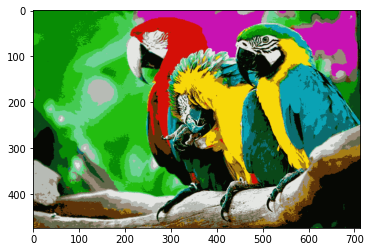

clusters: 18
 mean psnr: 22.334547750453446
clusters: 18
 meadian psnr: 22.334547750453446


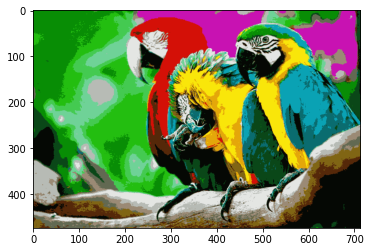

clusters: 19
 mean psnr: 22.521436714623462
clusters: 19
 meadian psnr: 22.521436714623462


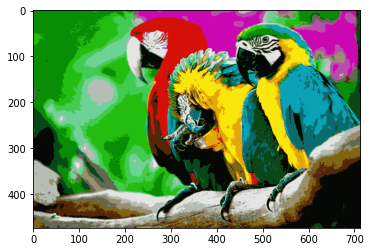

clusters: 20
 mean psnr: 22.724382135003115
clusters: 20
 meadian psnr: 22.724382135003115


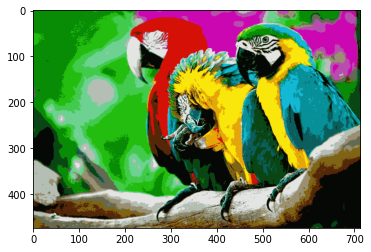

In [273]:
max_clusters = 20
for i in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241)
    kmeans.fit(converted)
    y = kmeans.labels_
    X_mean = converted.copy()
    X_median = converted.copy()
    for j in range(i):
        X_mean[y == j] = np.mean(converted[y == j], axis=0)
        X_median[y == j] = np.median(converted[y == j], axis=0)
    image_mean=X_mean.reshape(image.shape[0],image.shape[1],3)
    image_median=X_median.reshape(image.shape[0],image.shape[1],3)

    print(f'clusters: {i}\n mean psnr: {peak_signal_noise_ratio(image, image_mean)}')
    print(f'clusters: {i}\n meadian psnr: {peak_signal_noise_ratio(image, image_mean)}')
    pylab.imshow(X_mean.reshape(img_shape))
    plt.show()